In [114]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import matplotlib.ticker as ticker

In [115]:
%store -r select_states_population_change_df
%store -r select_states_sales_df
%store -r select_states_total_population_df 

In [116]:
select_states_population_change_df = select_states_population_change_df.rename(columns={'STNAME': 'State'})
select_states_population_change_df

,State,CTYNAME,Popestimate Yearly Change 2011(%),Popestimate Yearly Change 2012(%),Popestimate Yearly Change 2013(%),Popestimate Yearly Change 2014(%),Popestimate Yearly Change 2015(%),Popestimate Yearly Change 2016(%),Popestimate Yearly Change 2017(%),Popestimate Yearly Change 2018(%),Popestimate Yearly Change 2019(%),Popestimate Yearly Change 2020(%),Popestimate 10-Year Change 2020(%)
0,District of Columbia,District of Columbia,2.479505,2.490287,2.488765,1.848490,2.020937,1.560086,1.382102,1.013945,0.583117,0.644261,17.765934
1,Utah,Utah,1.419032,1.397934,1.563585,1.364508,1.541660,2.031588,1.947908,1.663036,1.528610,1.451466,17.095330
2,Texas,Texas,1.598957,1.710304,1.516348,1.825727,1.874559,1.621976,1.350430,1.178961,1.265452,1.290122,16.317561
49,Illinois,Illinois,0.212125,0.118482,0.098960,-0.082864,-0.197957,-0.294535,-0.326134,-0.431991,-0.453198,-0.627512,-1.970438
50,West Virginia,West Virginia,0.126249,0.045244,-0.144176,-0.226389,-0.391069,-0.591158,-0.750477,-0.699957,-0.591931,-0.583536,-3.746929


In [117]:

select_states_total_population_df.index.names = ["State"]
select_states_total_population_df 
sel_states_tot_pop_df = select_states_total_population_df.reset_index()
sel_states_tot_pop_df 

,State,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,District of Columbia,District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,Illinois,Illinois,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,Texas,Texas,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,Utah,Utah,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,West Virginia,West Virginia,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [118]:
select_states_sales_df #main to work with

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
StateName,,,,,,,,,,,
IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [119]:
#Change the name of the header 
select_states_population_yearly_change_df = select_states_population_change_df.rename(columns={
    'STNAME': 'State',
    'Popestimate Yearly Change 2011(%)': '2011',
    'Popestimate Yearly Change 2012(%)': '2012',
    'Popestimate Yearly Change 2013(%)': '2013',
    'Popestimate Yearly Change 2014(%)': '2014',
    'Popestimate Yearly Change 2015(%)': '2015',
    'Popestimate Yearly Change 2016(%)': '2016',
    'Popestimate Yearly Change 2017(%)': '2017',
    'Popestimate Yearly Change 2018(%)': '2018',
    'Popestimate Yearly Change 2019(%)': '2019',
    'Popestimate Yearly Change 2020(%)': '2020'
})

select_states_population_yearly_change_df.pop('CTYNAME')
sel_states_pop_ych_df = select_states_population_yearly_change_df
sel_states_pop_ych_df #main to work with

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Popestimate 10-Year Change 2020(%)
0,District of Columbia,2.479505,2.490287,2.488765,1.848490,2.020937,1.560086,1.382102,1.013945,0.583117,0.644261,17.765934
1,Utah,1.419032,1.397934,1.563585,1.364508,1.541660,2.031588,1.947908,1.663036,1.528610,1.451466,17.095330
2,Texas,1.598957,1.710304,1.516348,1.825727,1.874559,1.621976,1.350430,1.178961,1.265452,1.290122,16.317561
49,Illinois,0.212125,0.118482,0.098960,-0.082864,-0.197957,-0.294535,-0.326134,-0.431991,-0.453198,-0.627512,-1.970438
50,West Virginia,0.126249,0.045244,-0.144176,-0.226389,-0.391069,-0.591158,-0.750477,-0.699957,-0.591931,-0.583536,-3.746929


In [120]:
%store sel_states_pop_ych_df

Stored 'sel_states_pop_ych_df' (DataFrame)


In [121]:
sel_states_pop_ych_df

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Popestimate 10-Year Change 2020(%)
0,District of Columbia,2.479505,2.490287,2.488765,1.848490,2.020937,1.560086,1.382102,1.013945,0.583117,0.644261,17.765934
1,Utah,1.419032,1.397934,1.563585,1.364508,1.541660,2.031588,1.947908,1.663036,1.528610,1.451466,17.095330
2,Texas,1.598957,1.710304,1.516348,1.825727,1.874559,1.621976,1.350430,1.178961,1.265452,1.290122,16.317561
49,Illinois,0.212125,0.118482,0.098960,-0.082864,-0.197957,-0.294535,-0.326134,-0.431991,-0.453198,-0.627512,-1.970438
50,West Virginia,0.126249,0.045244,-0.144176,-0.226389,-0.391069,-0.591158,-0.750477,-0.699957,-0.591931,-0.583536,-3.746929


In [122]:
%store sel_states_pop_ych_df

Stored 'sel_states_pop_ych_df' (DataFrame)


In [123]:
state_pop_ych_df = sel_states_pop_ych_df.drop(columns = 'Popestimate 10-Year Change 2020(%)')
state_pop_ych_df

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,2.479505,2.490287,2.488765,1.848490,2.020937,1.560086,1.382102,1.013945,0.583117,0.644261
1,Utah,1.419032,1.397934,1.563585,1.364508,1.541660,2.031588,1.947908,1.663036,1.528610,1.451466
2,Texas,1.598957,1.710304,1.516348,1.825727,1.874559,1.621976,1.350430,1.178961,1.265452,1.290122
49,Illinois,0.212125,0.118482,0.098960,-0.082864,-0.197957,-0.294535,-0.326134,-0.431991,-0.453198,-0.627512
50,West Virginia,0.126249,0.045244,-0.144176,-0.226389,-0.391069,-0.591158,-0.750477,-0.699957,-0.591931,-0.583536


In [124]:
# Create a dictionary to rename the states
rename_dict = {'District of Columbia': 'DC', 'Utah': 'UT', 'Texas': 'TX', 'Illinois': 'IL', 'West Virginia': 'VA'}

In [125]:
# Rename the states
state_pop_ych_df['State'] = state_pop_ych_df['State'].replace(rename_dict)

state_pop_ych_df  #main to work with

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DC,2.479505,2.490287,2.488765,1.848490,2.020937,1.560086,1.382102,1.013945,0.583117,0.644261
1,UT,1.419032,1.397934,1.563585,1.364508,1.541660,2.031588,1.947908,1.663036,1.528610,1.451466
2,TX,1.598957,1.710304,1.516348,1.825727,1.874559,1.621976,1.350430,1.178961,1.265452,1.290122
49,IL,0.212125,0.118482,0.098960,-0.082864,-0.197957,-0.294535,-0.326134,-0.431991,-0.453198,-0.627512
50,VA,0.126249,0.045244,-0.144176,-0.226389,-0.391069,-0.591158,-0.750477,-0.699957,-0.591931,-0.583536


In [126]:
%store sel_states_pop_ych_df


Stored 'sel_states_pop_ych_df' (DataFrame)


In [127]:
sel_states_pop_ych_df.columns

Index(['State', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Popestimate 10-Year Change 2020(%)'],
      dtype='object')

In [128]:
# drop all years but keep 10-year change
state_10y_change_df = sel_states_pop_ych_df.drop(columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
state_10y_change_df

,State,Popestimate 10-Year Change 2020(%)
0,District of Columbia,17.765934
1,Utah,17.095330
2,Texas,16.317561
49,Illinois,-1.970438
50,West Virginia,-3.746929


In [129]:
rename_dict = {'District of Columbia': 'DC', 'Utah': 'UT', 'Texas': 'TX', 'Illinois': 'IL', 'West Virginia': 'VA'}
state_10y_change_df['State'] = state_10y_change_df['State'].replace(rename_dict)
state_10y_change_df #main for population change plot

,State,Popestimate 10-Year Change 2020(%)
0,DC,17.765934
1,UT,17.095330
2,TX,16.317561
49,IL,-1.970438
50,VA,-3.746929


In [130]:
#Change the name of the header 
sel_states_tot_pop_df  = sel_states_tot_pop_df .rename(columns={
    'STNAME': 'State',
    'POPESTIMATE2010': '2010',
    'POPESTIMATE2011': '2011',
    'POPESTIMATE2012': '2012',
    'POPESTIMATE2013': '2013',
    'POPESTIMATE2014': '2014',
    'POPESTIMATE2015': '2015',
    'POPESTIMATE2016': '2016',
    'POPESTIMATE2017': '2017',
    'POPESTIMATE2018': '2018',
    'POPESTIMATE2019': '2019',
    'POPESTIMATE2020': '2020'
})

sel_states_tot_pop_df 

,State,CTYNAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,District of Columbia,District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,Illinois,Illinois,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,Texas,Texas,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,Utah,Utah,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,West Virginia,West Virginia,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [131]:
# Create a dictionary to rename the states
rename_dict = {'District of Columbia': 'DC', 'Utah': 'UT', 'Texas': 'TX', 'Illinois': 'IL', 'West Virginia': 'VA'}

In [132]:
# Rename the states
sel_states_tot_pop_df['State'] = sel_states_tot_pop_df['State'].replace(rename_dict)
total_population_df = sel_states_tot_pop_df.drop(columns = 'CTYNAME')
total_population_df  #main to work with

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DC,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,IL,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,TX,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,UT,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,VA,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [133]:
%store total_population_df

Stored 'total_population_df' (DataFrame)


In [134]:
# Graphs 
state_10y_change_df
#state_10y_change_df.set_index('State', inplace=True)


,State,Popestimate 10-Year Change 2020(%)
0,DC,17.765934
1,UT,17.095330
2,TX,16.317561
49,IL,-1.970438
50,VA,-3.746929


In [135]:
# Save the plot as image
plt.savefig('Population % Change 10 year', dpi=300)

<Figure size 640x480 with 0 Axes>

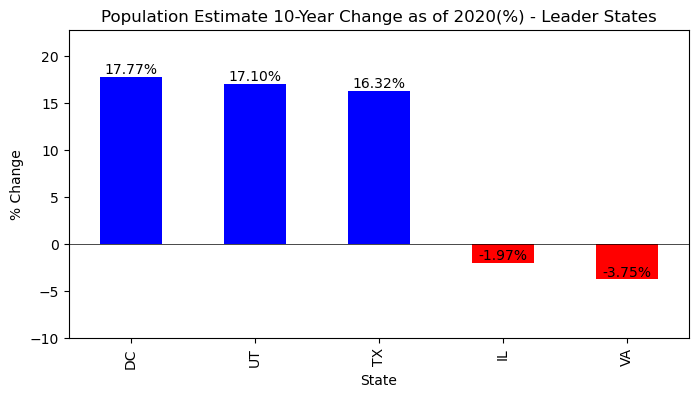

In [136]:
# Create a bar chart 
ax = state_10y_change_df.plot.bar(x="State", y='Popestimate 10-Year Change 2020(%)', color=['blue', 'blue', 'blue', 'red', 'red'], legend=False, figsize=(8, 4))

# Add data labels to the bars
for p in ax.patches:
    label_text = f"{p.get_height():.2f}%"  # Format to two decimal places
    ax.annotate(label_text, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Set a title for the plot
plt.title('Population Estimate 10-Year Change as of 2020(%) - Leader States')

# Set labels for x and y axes
plt.xlabel('State')
plt.ylabel('% Change')

# Add a horizontal line at y=0
plt.axhline(0, color='black', linewidth=0.5)

# Add space above the bars
ax.set_ylim(-10, max(state_10y_change_df['Popestimate 10-Year Change 2020(%)']) + 5)

# Save the plot as a JPG image
plt.savefig('population_10ychange_chart.jpg', format='jpg')

plt.show()

In [137]:
# Population total graph

In [138]:
total_population_df 

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,DC,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
1,IL,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
2,TX,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
3,UT,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
4,VA,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [139]:
# Setting "State" column as an index for easy manipulation to make a graph
pop_df = total_population_df.set_index('State')
pop_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
DC,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
IL,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
TX,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
UT,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
VA,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [140]:
pop_df = pop_df.transpose()
pop_df

State,DC,IL,TX,UT,VA
2010,605282,12840545,25241897,2775413,1854265
2011,620290,12867783,25645504,2814797,1856606
2012,635737,12883029,26084120,2854146,1857446
2013,651559,12895778,26479646,2898773,1854768
2014,663603,12885092,26963092,2938327,1850569
2015,677014,12859585,27468531,2983626,1843332
2016,687576,12821709,27914064,3044241,1832435
2017,697079,12779893,28291024,3103540,1818683
2018,704147,12724685,28624564,3155153,1805953
2019,708253,12667017,28986794,3203383,1795263


<Axes: >

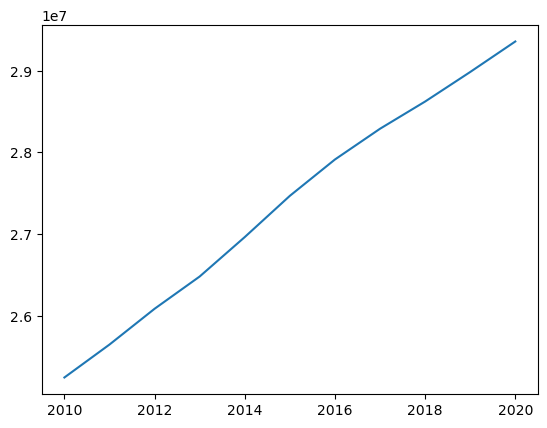

In [141]:
pop_df.TX.plot()

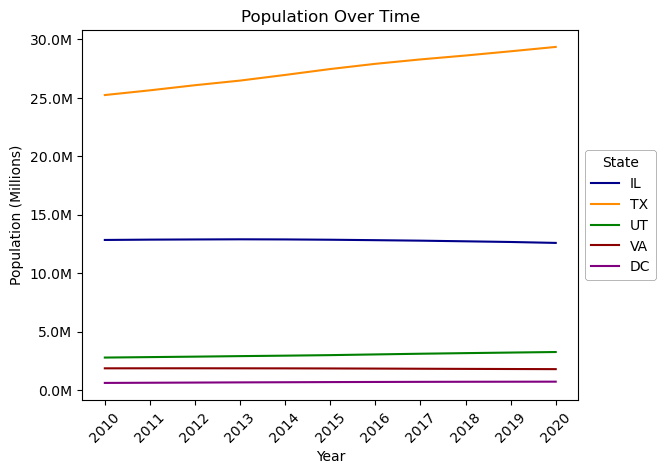

In [143]:
# Plot a line chart for each state
# Define custom colors for specific states
state_colors = {
    'IL': 'darkblue',
    'TX': 'darkorange',
    'UT': 'green',
    'VA': 'darkred',
    'DC': 'purple'
}

for state, color in state_colors.items():
    plt.plot(pop_df.index, pop_df[state], label=state, color=color)

# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
legend = plt.legend(title='State', loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_alpha(0.8)

# Modify Y-axis labels to display in millions
def format_millions(x, pos):
    return f'{x/1000000:.1f}M'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_millions))

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add a title to the plot
plt.title('Population Over Time')

# Save the plot as a JPG image
plt.savefig('Population_chart.jpg', format='jpg', bbox_inches='tight')

# Display the plot
plt.show()

In [144]:
state_10y_change_df

,State,Popestimate 10-Year Change 2020(%)
0,DC,17.765934
1,UT,17.095330
2,TX,16.317561
49,IL,-1.970438
50,VA,-3.746929


In [145]:
# Residential Sales Graph total
select_states_sales_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
StateName,,,,,,,,,,,
IL,59779.0,59571,74902,93725,100689,113144,123797.0,123867,129384,122175,135944.0
TX,93241.0,94298,112232,134382,136227,144533,151306.0,154065,154210,158770,173511.0
UT,18356.0,19235,24019,27369,27877,33008,35399.0,34867,33972,34607,36991.0
VA,70839.0,65667,75558,87705,84784,95447,104942.0,111890,110752,115225,128283.0
WA,26889.0,27330,37158,46846,48530,57052,63002.0,65469,60361,58065,59939.0


In [56]:
# Transpose the DataFrame to have years as rows
select_states_sales_df = select_states_sales_df.transpose()
select_states_sales_df

StateName,IL,TX,UT,VA,WA
2010,59779.0,93241.0,18356.0,70839.0,26889.0
2011,59571.0,94298.0,19235.0,65667.0,27330.0
2012,74902.0,112232.0,24019.0,75558.0,37158.0
2013,93725.0,134382.0,27369.0,87705.0,46846.0
2014,100689.0,136227.0,27877.0,84784.0,48530.0
2015,113144.0,144533.0,33008.0,95447.0,57052.0
2016,123797.0,151306.0,35399.0,104942.0,63002.0
2017,123867.0,154065.0,34867.0,111890.0,65469.0
2018,129384.0,154210.0,33972.0,110752.0,60361.0
2019,122175.0,158770.0,34607.0,115225.0,58065.0


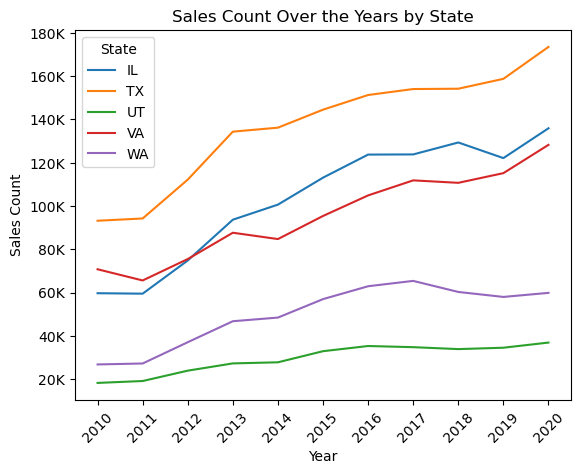

In [57]:
# Plot a line chart for each state
for state in select_states_sales_df.columns:
    plt.plot(select_states_sales_df.index, select_states_sales_df[state], label=state)
state_colors = {
    'IL': 'darkblue',
    'TX': 'darkorange',
    'UT': 'green',
    'VA': 'darkred',
    'WA': 'purple'
}


# Set plot labels and legend
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(title='State')

# Add a title to the plot
plt.title('Sales Count Over the Years by State')

# Modify Y-axis labels to display in thousands
def format_thousands(x, pos):
    return f'{x/1000:.0f}K'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_thousands))

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Save the plot as a JPG image
plt.savefig('Sales_chart.jpg', format='jpg')

# Display the plot
plt.show()



In [58]:
# Correlation Population vs Sales
select_states_sales_df
select_states_sales_df = select_states_sales_df[['WA', 'IL', 'TX', 'UT', 'VA']]
select_states_sales_df


StateName,WA,IL,TX,UT,VA
2010,26889.0,59779.0,93241.0,18356.0,70839.0
2011,27330.0,59571.0,94298.0,19235.0,65667.0
2012,37158.0,74902.0,112232.0,24019.0,75558.0
2013,46846.0,93725.0,134382.0,27369.0,87705.0
2014,48530.0,100689.0,136227.0,27877.0,84784.0
2015,57052.0,113144.0,144533.0,33008.0,95447.0
2016,63002.0,123797.0,151306.0,35399.0,104942.0
2017,65469.0,123867.0,154065.0,34867.0,111890.0
2018,60361.0,129384.0,154210.0,33972.0,110752.0
2019,58065.0,122175.0,158770.0,34607.0,115225.0


In [59]:
pop_df.columns
pop_df = pop_df [['WA', 'IL', 'TX', 'UT', 'VA']]

pop_df

State,WA,IL,TX,UT,VA
2010,605282,12840545,25241897,2775413,1854265
2011,620290,12867783,25645504,2814797,1856606
2012,635737,12883029,26084120,2854146,1857446
2013,651559,12895778,26479646,2898773,1854768
2014,663603,12885092,26963092,2938327,1850569
2015,677014,12859585,27468531,2983626,1843332
2016,687576,12821709,27914064,3044241,1832435
2017,697079,12779893,28291024,3103540,1818683
2018,704147,12724685,28624564,3155153,1805953
2019,708253,12667017,28986794,3203383,1795263


In [60]:

correlation_matrix = pop_df.corrwith(select_states_sales_df)
print(correlation_matrix)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

State
WA    0.947718
IL   -0.674785
TX    0.961749
UT    0.917333
VA   -0.928514
dtype: float64


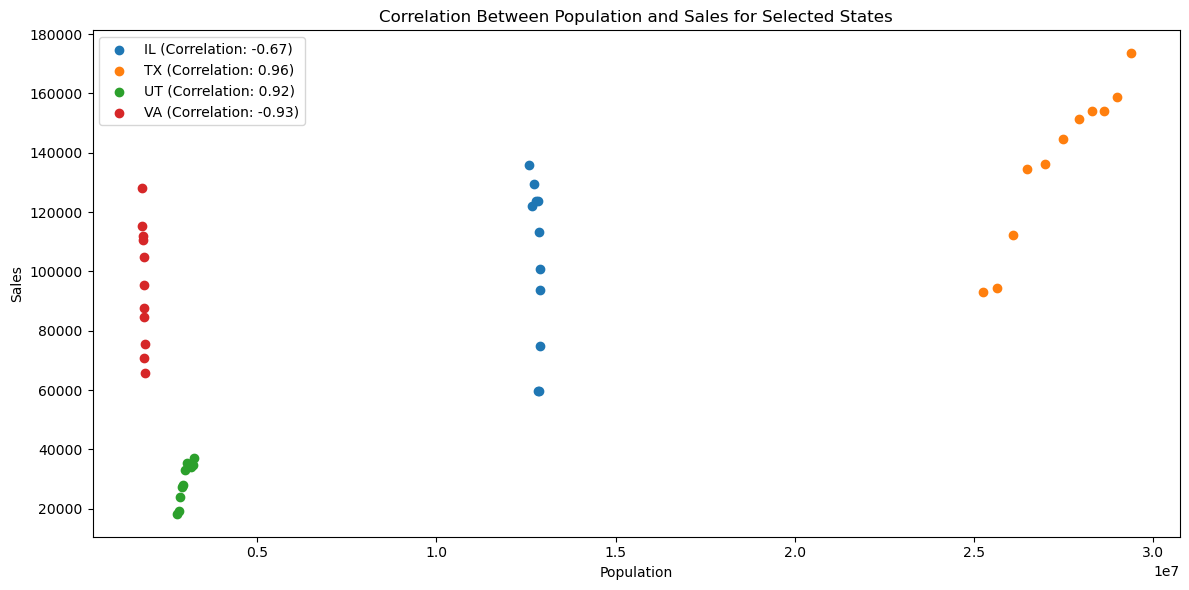

In [61]:
# Select the states you want to include
states_to_plot = ['IL', 'TX', 'UT', 'VA']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Loop through the selected states and plot their population against sales
for state in states_to_plot:
    correlation = pop_df[state].corr(select_states_sales_df[state])
    ax.scatter(pop_df[state], select_states_sales_df[state], label=f'{state} (Correlation: {correlation:.2f})')

# Set axis labels
ax.set_xlabel('Population')
ax.set_ylabel('Sales')

# Add a legend
ax.legend()

# Set a title for the plot
ax.set_title('Correlation Between Population and Sales for Selected States')

# Save the plot as a JPG image
plt.savefig('Correlation Chart.jpg', format='jpg')

# Show the plot
plt.tight_layout()
plt.show()